In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 


In [2]:
rating = pd.read_csv("../input/recommednation-system/rating.csv")
places = pd.read_csv("../input/recommednation-system/PLacesid.csv")


In [3]:
places.head()

,Unnamed: 0,Places,ID,Location,unknown,religious,pharaonic,modern,ancient,natural,romanian,humanly,fun,Islamic,Coptic
0,0,The Egyptian Museum In Cairo,0,Cairo,0,0,1,0,1,0,0,1,0,0,0
1,1,The Hanging Church,1,Cairo,0,1,0,0,1,0,0,1,0,0,1
2,2,Ben Ezra Synagogue,2,Cairo,0,1,0,1,0,0,0,1,0,0,1
3,3,Amr Ibn Al-Aas Mosque,3,Cairo,0,1,0,0,1,0,0,1,0,1,0
4,4,Wadi El Natrun monasteries,4,Behira,0,1,0,0,1,0,0,1,0,0,1


In [4]:
rating.head()

,Unnamed: 0,user id,place name,place id,rate
0,0,0,The Egyptian Museum In Cairo,0,4
1,1,1,The Egyptian Museum In Cairo,0,0
2,2,2,The Egyptian Museum In Cairo,0,5
3,3,3,The Egyptian Museum In Cairo,0,2
4,4,4,The Egyptian Museum In Cairo,0,5


In [5]:
print('Number of places : ',  len(places))
print('Number of Ratign : ',len(rating))
print('Number of Users :' ,  len(rating['user id'].unique()))

Number of places :  126
Number of Ratign :  10332
Number of Users : 82


In [6]:
rating.dropna(inplace= True )
rating.head()

,Unnamed: 0,user id,place name,place id,rate
0,0,0,The Egyptian Museum In Cairo,0,4
1,1,1,The Egyptian Museum In Cairo,0,0
2,2,2,The Egyptian Museum In Cairo,0,5
3,3,3,The Egyptian Museum In Cairo,0,2
4,4,4,The Egyptian Museum In Cairo,0,5


In [7]:
rating.describe()

,Unnamed: 0,user id,place id,rate
count,10332.000000,10332.000000,10332.000000,10332.000000
mean,5165.500000,40.500000,62.500000,2.486547
std,2982.735825,23.670746,36.373682,1.702462
min,0.000000,0.000000,0.000000,0.000000
25%,2582.750000,20.000000,31.000000,1.000000
50%,5165.500000,40.500000,62.500000,2.000000
75%,7748.250000,61.000000,94.000000,4.000000
max,10331.000000,81.000000,125.000000,5.000000


Text(0.5, 0, 'Rating range')

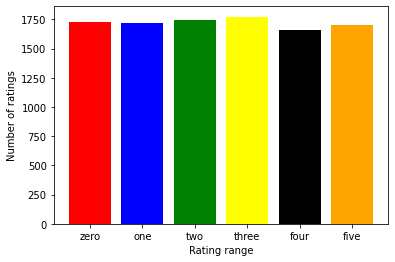

In [8]:
fig, ax = plt.subplots()
ax.bar("zero",rating[rating['rate'] == 0 ].count(),label="zero",color="red")
ax.bar("one",rating[rating['rate'] == 1 ].count(),label="one",color="blue")
ax.bar("two",rating[rating['rate'] == 2 ].count(),label="tww",color="green")
ax.bar("three",rating[rating['rate'] == 3 ].count(),label="three",color="yellow")
ax.bar("four",rating[rating['rate'] == 4 ].count(),label="four",color="black")
ax.bar("five",rating[rating['rate'] == 5 ].count(),label="five",color="orange")
ax.set_ylabel('Number of ratings')
ax.set_xlabel('Rating range')

In [9]:
user_to_place = rating.pivot(
    index='user id',
     columns='place name',
      values='rate')

user_to_place.head()

place name,Abdeen Palace,Abu Atwa Tank Museum,Abu Simbel,Abu Sir area,Agricultural Museum,Aisha Fahmy Palace,Al-Azhar Mosque,Al-Shatby Tombs,Alf Layla we Layla,Amr Ibn Al-Aas Mosque,...,Western Mountain Cemetery,al-markh plain,ancient mosques,black head temple,cave valley,eastern port,el-Amarna Hill,incomplete obelisk,red monastery,sand museum
user id,,,,,,,,,,,,,,,,,,,,,
0,1,3,5,3,5,5,5,2,2,5,...,4,3,5,5,2,4,2,2,1,1
1,5,0,3,3,2,1,3,1,5,1,...,0,0,5,4,0,3,5,5,0,0
2,1,5,0,2,2,1,4,2,2,1,...,4,2,5,0,4,2,2,5,0,3
3,5,3,5,2,2,4,3,4,2,3,...,0,4,1,2,0,2,2,0,1,5
4,3,0,5,2,1,0,1,4,1,2,...,2,4,2,3,1,3,4,0,1,2


In [10]:
user_to_place_sparse = csr_matrix(user_to_place.values)
user_to_place_sparse

<82x126 sparse matrix of type '<class 'numpy.int64'>'
	with 8601 stored elements in Compressed Sparse Row format>

In [11]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_place_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [12]:
def get_similar_users(user, n = 5):

    knn_input = np.asarray([user_to_place.values[user-1]]) 
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [13]:
from pprint import pprint
user_id = 5
print(" Few of PLaces seen by the User:")
pprint(list(rating[rating['user id'] == user_id]['place name'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of PLaces seen by the User:
['The Egyptian Museum In Cairo',
 'The Hanging Church',
 'Ben Ezra Synagogue',
 'Amr Ibn Al-Aas Mosque',
 'Wadi El Natrun monasteries',
 'St. Barbara Church',
 'Coptic Museum',
 'National Museum Of Alexandria',
 'Bibliotheca Alexandria',
 'Luxor Temple']
Top 5 users who are very much similar to the User- 5 are: 
 
1 . User: 82 separated by distance of 0.24427140964639726
2 . User: 4 separated by distance of 0.2585297066004024
3 . User: 35 separated by distance of 0.26329105855577906
4 . User: 46 separated by distance of 0.27225552648124407
5 . User: 12 separated by distance of 0.27546149873239445


In [14]:
place_dict = {place : index for index, place in enumerate(list(places.Places))}
print(place_dict)

{'The Egyptian Museum In Cairo': 0, 'The Hanging Church': 1, 'Ben Ezra Synagogue': 2, 'Amr Ibn Al-Aas Mosque': 3, 'Wadi El Natrun monasteries': 4, 'St. Barbara Church': 5, 'Coptic Museum': 6, 'National Museum Of Alexandria': 7, 'Bibliotheca Alexandria': 8, 'Luxor Temple': 9, 'Karnak Temple': 10, 'Valley Of The Kings': 11, 'Valley Of The Queens': 12, 'Deir El Medineh': 13, 'Tel Basta': 14, 'Dahshur Pyramids': 15, 'Giza Plateau': 16, 'Saqqara': 17, 'Royal Jewelry Museum': 18, 'Philae': 19, 'Abu Simbel': 20, 'Mummification Museum': 21, 'Hurghada Museum': 22, 'Sharm al-Sheikh Museum': 23, "Saint Catherine's Monastery": 24, 'Citadel of saladin cairo': 25, 'The Royal Carriages Museum': 26, 'Abdeen Palace': 27, 'Citadel of Qaitbay': 28, 'Museum of Islamic Art': 29, 'National Museum of Egyptian Civilization(NMEC)': 30, 'Baron Empain Palace': 31, 'Cairo Tower': 32, 'Khan el-Khalili': 33, 'Bayt Al-Suhaymi': 34, 'Muhammad Ali Pasha Palace': 35, 'Muhammad Ali Mosque': 36, 'Aswan Museum': 37, 'Temp

In [15]:
place_list = list(places.Places)

In [16]:
def get_similar_movies(place, n = 10):
    index = place_dict[place]
    knn_input = np.asarray([user_to_place.values[index]])
    n = min(len(place_list)-1,n)
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
    print("Top",n,"places which are very much similar to the place-",place, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(place_list[indices[0][i]])

In [17]:
from pprint import pprint
place_name = 'The Egyptian Museum In Cairo'

get_similar_movies(place_name,5)

Top 5 places which are very much similar to the place- The Egyptian Museum In Cairo are: 
 
The sunken cities of Abu Qir
Mit rahina monuments
Rameseum
Tel Basta
Mustafa Kamel tombs
